In [0]:
!git clone https://github.com/mohneesh7/Win-Arch-py-pipe.git

fatal: destination path 'Win-Arch-py-pipe' already exists and is not an empty directory.


In [0]:
%cd Win-Arch-py-pipe/

/content/Win-Arch-py-pipe


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [0]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
!ls

 Anime.csv	   'chunking (5).py'
 app.py		   'Lemmatize (8).py'
 Basic-1.py	    myanimelist-anime-dataset-as-20190204.zip
 Basic-2.py	   'Named-entity-recognition (7).py'
 Basic-3.py	   'Pos-tagging (4).py'
 bigram.py	    README.md
'Chinking (6).py'   utils.py


In [0]:
!unzip myanimelist-anime-dataset-as-20190204.zip

Archive:  myanimelist-anime-dataset-as-20190204.zip
replace Anime.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Anime.csv               


In [0]:
anime = pd.read_csv('Anime.csv')

In [0]:
anime_cpy = pd.read_csv('Anime.csv')

In [0]:
anime.head()

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,Finished Airing,False,"{'from': '1998-04-03T00:00:00+00:00', 'to': '1...",24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,Finished Airing,False,"{'from': '2001-09-01T00:00:00+00:00', 'to': No...",1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,Finished Airing,False,"{'from': '1998-04-01T00:00:00+00:00', 'to': '1...",24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN,['WHR'],TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,Finished Airing,False,"{'from': '2002-07-02T00:00:00+00:00', 'to': '2...",25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,NaN,Summer 2002,Tuesdays at Unknown,{}
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,['Adventure King Beet'],TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,Finished Airing,False,"{'from': '2004-09-30T00:00:00+00:00', 'to': '2...",23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,NaN,Fall 2004,Thursdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."


In [0]:
list_1 = anime.columns

In [0]:
list_1 = list_1.tolist()

In [0]:
list_1 = [x.strip() for x in list_1 ]

In [0]:
list_1

['animeID',
 'name',
 'title_english',
 'title_japanese',
 'title_synonyms',
 'type',
 'source',
 'producers',
 'genre',
 'studio',
 'episodes',
 'status',
 'airing',
 'aired',
 'duration',
 'rating',
 'score',
 'scored_by',
 'rank',
 'popularity',
 'members',
 'favorites',
 'synopsis',
 'background',
 'premiered',
 'broadcast',
 'related']

In [0]:
anime.columns = list_1

In [0]:
anime.head()

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,Finished Airing,False,"{'from': '1998-04-03T00:00:00+00:00', 'to': '1...",24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,Finished Airing,False,"{'from': '2001-09-01T00:00:00+00:00', 'to': No...",1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,Finished Airing,False,"{'from': '1998-04-01T00:00:00+00:00', 'to': '1...",24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN,['WHR'],TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,Finished Airing,False,"{'from': '2002-07-02T00:00:00+00:00', 'to': '2...",25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,NaN,Summer 2002,Tuesdays at Unknown,{}
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,['Adventure King Beet'],TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,Finished Airing,False,"{'from': '2004-09-30T00:00:00+00:00', 'to': '2...",23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,NaN,Fall 2004,Thursdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."


In [0]:
anime.shape

(15278, 27)

In [0]:
anime.describe()

,animeID,episodes,score,scored_by,rank,popularity,members,favorites
count,15278.000000,14732.000000,14778.000000,1.527300e+04,13669.000000,15273.000000,1.527300e+04,15273.000000
mean,19002.639416,11.726378,6.284508,1.210701e+04,6917.408004,7741.991292,2.450721e+04,329.457016
std,13706.437012,49.939231,1.073349,4.692942e+04,4003.814986,4482.323035,8.223672e+04,2829.335394
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,5209.250000,1.000000,5.600000,4.700000e+01,3448.000000,3855.000000,2.440000e+02,0.000000
50%,18308.000000,2.000000,6.370000,4.700000e+02,6932.000000,7769.000000,1.630000e+03,2.000000
75%,33025.750000,12.000000,7.050000,3.857000e+03,10416.000000,11627.000000,1.047200e+04,23.000000
max,39199.000000,3057.000000,10.000000,1.107955e+06,13838.000000,15474.000000,1.610561e+06,120331.000000


In [0]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15278 entries, 0 to 15277
Data columns (total 27 columns):
animeID           15278 non-null int64
name              15278 non-null object
title_english     6122 non-null object
title_japanese    15230 non-null object
title_synonyms    15273 non-null object
type              15273 non-null object
source            15273 non-null object
producers         15273 non-null object
genre             15273 non-null object
studio            15273 non-null object
episodes          14732 non-null float64
status            15273 non-null object
airing            15273 non-null object
aired             15273 non-null object
duration          15273 non-null object
rating            15273 non-null object
score             14778 non-null float64
scored_by         15273 non-null float64
rank              13669 non-null float64
popularity        15273 non-null float64
members           15273 non-null float64
favorites         15273 non-null float64
synops

In [0]:
anime.drop(columns=['title_english','title_japanese','title_synonyms','producers','status','airing','aired','synopsis','background','premiered','broadcast','related'],inplace=True)

In [0]:
anime.shape

(15278, 15)

In [0]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15278 entries, 0 to 15277
Data columns (total 15 columns):
animeID       15278 non-null int64
name          15278 non-null object
type          15273 non-null object
source        15273 non-null object
genre         15273 non-null object
studio        15273 non-null object
episodes      14732 non-null float64
duration      15273 non-null object
rating        15273 non-null object
score         14778 non-null float64
scored_by     15273 non-null float64
rank          13669 non-null float64
popularity    15273 non-null float64
members       15273 non-null float64
favorites     15273 non-null float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.7+ MB


In [0]:
null_rows = anime.index[anime['genre'].isnull()].tolist()

In [0]:
anime.drop(null_rows,inplace=True)

In [0]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15273 entries, 0 to 15277
Data columns (total 15 columns):
animeID       15273 non-null int64
name          15273 non-null object
type          15273 non-null object
source        15273 non-null object
genre         15273 non-null object
studio        15273 non-null object
episodes      14732 non-null float64
duration      15273 non-null object
rating        15273 non-null object
score         14778 non-null float64
scored_by     15273 non-null float64
rank          13669 non-null float64
popularity    15273 non-null float64
members       15273 non-null float64
favorites     15273 non-null float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.9+ MB


In [0]:
anime[anime['episodes'].isnull()]

,animeID,name,type,source,genre,studio,episodes,duration,rating,score,scored_by,rank,popularity,members,favorites
10,21,One Piece,TV,Manga,"['Action', 'Adventure', 'Comedy', 'Super Power...",['Toei Animation'],NaN,24 min,PG-13 - Teens 13 or older,8.53,465454.0,94.0,36.0,803871.0,76869.0
190,235,Detective Conan,TV,Manga,"['Adventure', 'Mystery', 'Comedy', 'Police', '...",['TMS Entertainment'],NaN,25 min,PG-13 - Teens 13 or older,8.25,83970.0,286.0,537.0,172217.0,8564.0
819,966,Crayon Shin-chan,TV,Manga,"['Slice of Life', 'Comedy', 'Ecchi', 'School',...",['Shin-Ei Animation'],NaN,21 min,PG - Children,7.74,19037.0,1007.0,1995.0,38234.0,653.0
1023,1199,Nintama Rantarou,TV,Manga,"['Comedy', 'Kids']",['Ajia-Do'],NaN,10 min,G - All Ages,7.15,1125.0,3087.0,6072.0,3495.0,52.0
1682,1960,Sore Ike! Anpanman,TV,Picture book,"['Comedy', 'Kids', 'Fantasy']",['TMS Entertainment'],NaN,24 min,PG - Children,6.63,462.0,5232.0,8088.0,1419.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15272,39194,Shin Chuuka Ichiban!,Unknown,Manga,"['Comedy', 'Shounen']","['Production I.G', 'Nihon Ad Systems']",NaN,Unknown,None,NaN,2.0,NaN,13098.0,216.0,0.0
15273,39195,Beastars,TV,Manga,"['Slice of Life', 'Psychological', 'Drama', 'S...",[],NaN,Unknown,None,NaN,0.0,NaN,14917.0,67.0,0.0
15274,39196,Mairimashita! Iruma-kun,TV,Manga,"['Comedy', 'Demons', 'Supernatural', 'Fantasy'...",[],NaN,Unknown,None,NaN,0.0,NaN,15231.0,59.0,0.0
15276,39198,Kanata no Astra,TV,Manga,"['Action', 'Sci-Fi', 'Shounen', 'Space']",['Lerche'],NaN,Unknown,None,NaN,0.0,0.0,0.0,0.0,2.0


In [0]:
anime['episodes'][anime['name']=='One Piece'] = 900

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
anime.fillna({'episodes':12},inplace=True)

* This requires a bit of domain knowledge, as every season of anime has 12 episodes, I am not imputing mean or median.

In [0]:
anime.fillna({'score':anime['score'].median()},inplace=True)

In [0]:
anime.fillna({'rank':anime['rank'].median()},inplace=True)

In [0]:
unaired = anime.index[anime['rank'] == 0].tolist()

In [0]:
anime.drop(unaired,inplace=True)

In [0]:
anime.loc[anime.type == 'Manga','type'] = 'TV'

In [0]:
anime.loc[anime.source == 'Unknown','source'] = 'Manga'

In [0]:
anime.drop(columns=['studio'],inplace=True)

In [0]:
anime.drop(columns=['rating','duration'],inplace=True)

In [0]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15235 entries, 0 to 15275
Data columns (total 12 columns):
animeID       15235 non-null int64
name          15235 non-null object
type          15235 non-null object
source        15235 non-null object
genre         15235 non-null object
episodes      15235 non-null float64
score         15235 non-null float64
scored_by     15235 non-null float64
rank          15235 non-null float64
popularity    15235 non-null float64
members       15235 non-null float64
favorites     15235 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [0]:
cor_matrix = anime.corr()

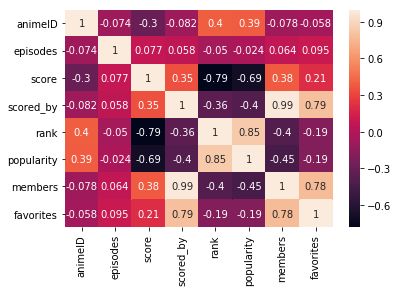

In [0]:
sns.heatmap(cor_matrix,annot=True)


* All obviuos correlations can be seen, no new insight can be inferred from this, like when score increases rank decreases hence its cell is too cold, similarly for popularity as MAL popularity work similar to rank(smaller is better)

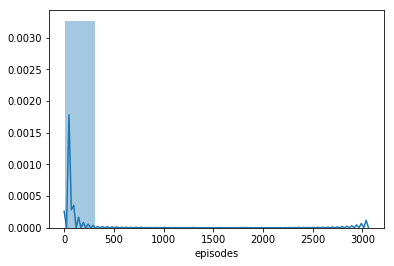

In [0]:
sns.distplot(anime.episodes,bins=10)
plt.show()

* Most episodes have below 25-26 episode, except the long running shounen series and children cartoon from the 90's. let's check it below to be sure

In [0]:
anime.episodes.quantile(.90)

26.0

In [0]:
anime.episodes.quantile(0.99)

104.0

* As you can see 99% of the anime has episodes below ~100 and 90% of them below 26

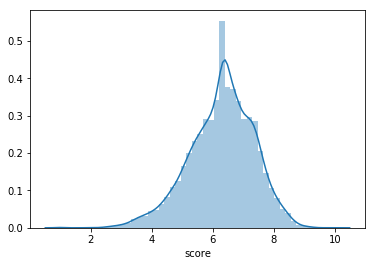

In [0]:
sns.distplot(anime.score)
plt.show()

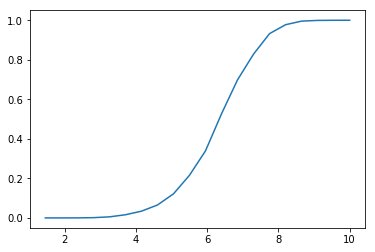

In [0]:
hist,edges = np.histogram(anime.score,bins=20)
pdf = hist/sum(hist)
cdf = np.cumsum(pdf)
plt.plot(edges[1:],cdf)

In [0]:
anime[anime.score == 10]

,animeID,name,type,source,genre,episodes,score,scored_by,rank,popularity,members,favorites
12630,35103,Tanabata Monogatari,OVA,Other,"['Historical', 'Kids']",1.0,10.0,1.0,13267.0,14909.0,55.0,0.0
14962,38781,Violence Voyager,Movie,Original,"['Adventure', 'Comedy', 'Horror']",1.0,10.0,1.0,13544.0,14765.0,65.0,0.0


* These could trouble us because they have only 1 scorer and have a perfect score, if it was a classification task this would have to be engineered into another feature or we would get wrong result. In this case this is irrelevant I guess.

### Further Exploration is unnecessary.

# Normalization
* I will go with normalization over Standardization because we have score from 1-10 and episodes spanning to over 3000, MinMaxScalar can be used to bring everything we need into the range [0-1]

* Before that we need to convert the categorical variables to numerical to get the optimum result.

In [0]:
type_dummy = pd.get_dummies(anime.type)
source_dummy = pd.get_dummies(anime.source)


In [0]:
for i in range(1,len(anime.genre)):
  s = anime.genre.iloc[i]
  anime.genre.iloc[i] = eval(s)
  print(i)


In [0]:
anime.drop(0)

In [0]:
genre_dummy = pd.get_dummies(anime.explode("genre").pivot(columns="genre", values="genre"))


In [0]:
genre_dummy.drop(columns=['''['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space']_['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space']'''],inplace=True)

In [0]:
genre_dummy

,Action_Action,Adventure_Adventure,Cars_Cars,Comedy_Comedy,Dementia_Dementia,Demons_Demons,Drama_Drama,Ecchi_Ecchi,Fantasy_Fantasy,Game_Game,Harem_Harem,Hentai_Hentai,Historical_Historical,Horror_Horror,Josei_Josei,Kids_Kids,Magic_Magic,Martial Arts_Martial Arts,Mecha_Mecha,Military_Military,Music_Music,Mystery_Mystery,Parody_Parody,Police_Police,Psychological_Psychological,Romance_Romance,Samurai_Samurai,School_School,Sci-Fi_Sci-Fi,Seinen_Seinen,Shoujo_Shoujo,Shoujo Ai_Shoujo Ai,Shounen_Shounen,Shounen Ai_Shounen Ai,Slice of Life_Slice of Life,Space_Space,Sports_Sports,Super Power_Super Power,Supernatural_Supernatural,Thriller_Thriller,Vampire_Vampire,Yaoi_Yaoi,Yuri_Yuri
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15271,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15272,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
15273,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
15274,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


* There is no need for name columns as we are just measuring the spatial distance between vectors.

In [0]:
anime.drop(columns=['name','type','source','genre'],inplace=True)

In [0]:
anime.head()

,animeID,episodes,score,scored_by,rank,popularity,members,favorites
0,1,26.0,8.81,405664.0,26.0,39.0,795733.0,43460.0
1,5,1.0,8.41,120243.0,164.0,449.0,197791.0,776.0
2,6,26.0,8.30,212537.0,255.0,146.0,408548.0,10432.0
3,7,26.0,7.33,32837.0,2371.0,1171.0,79397.0,537.0
4,8,52.0,7.03,4894.0,3544.0,3704.0,11708.0,14.0


In [0]:
main_anime = pd.concat([anime,type_dummy,source_dummy,genre_dummy] ,axis=1)

In [0]:
main_anime.columns

Index(['animeID', 'episodes', 'score', 'scored_by', 'rank', 'popularity',
       'members', 'favorites', 'Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV',
       'Unknown', '4-koma manga', 'Book', 'Card game', 'Digital manga', 'Game',
       'Light novel', 'Manga', 'Music', 'Novel', 'Original', 'Other',
       'Picture book', 'Radio', 'Visual novel', 'Web manga', 'Action_Action',
       'Adventure_Adventure', 'Cars_Cars', 'Comedy_Comedy',
       'Dementia_Dementia', 'Demons_Demons', 'Drama_Drama', 'Ecchi_Ecchi',
       'Fantasy_Fantasy', 'Game_Game', 'Harem_Harem', 'Hentai_Hentai',
       'Historical_Historical', 'Horror_Horror', 'Josei_Josei', 'Kids_Kids',
       'Magic_Magic', 'Martial Arts_Martial Arts', 'Mecha_Mecha',
       'Military_Military', 'Music_Music', 'Mystery_Mystery', 'Parody_Parody',
       'Police_Police', 'Psychological_Psychological', 'Romance_Romance',
       'Samurai_Samurai', 'School_School', 'Sci-Fi_Sci-Fi', 'Seinen_Seinen',
       'Shoujo_Shoujo', 'Shoujo Ai_Shou

In [0]:
min_max = MinMaxScaler()

In [0]:
main_anime = min_max.fit_transform(main_anime)

In [0]:
recom_model = NearestNeighbors(n_neighbors=6,algorithm='ball_tree').fit(main_anime)


In [0]:
distance, indices = recom_model.kneighbors(main_anime)

In [0]:
distance[0:5]

array([[0.        , 1.17986705, 1.31146115, 1.32347577, 1.33376554,
        1.35361412],
       [0.        , 1.50158779, 1.5629315 , 1.67722375, 1.74142038,
        1.75135608],
       [0.        , 1.19793067, 1.42368844, 1.44348633, 1.44671208,
        1.45167989],
       [0.        , 1.73212142, 1.93097169, 2.00245672, 2.00998313,
        2.01155185],
       [0.        , 0.10915917, 0.12919458, 0.30975755, 0.32866445,
        1.06842358]])

In [0]:
indices[0:5]

array([[    0,  4301,  4194,  3910,  1446,  2533],
       [    1,  2638,  8656,  1105,  1957,  2655],
       [    2,  2716,   120,  3331,    13,   893],
       [    3,   219, 11123,  1375,   591,   978],
       [    4,   959,   529,  4389,  5116,  2355]])

In [0]:
anime[anime.index == 219]['animeID']

219    272
Name: animeID, dtype: int64

In [0]:
anime_cpy[anime_cpy['animeID'] == 272][' name']

219    Noir
Name:  name, dtype: object

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,episodes,status,airing,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,Finished Airing,False,"{'from': '1998-04-03T00:00:00+00:00', 'to': '1...",24 min per ep,R - 17+ (violence & profanity),8.81,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,Finished Airing,False,"{'from': '2001-09-01T00:00:00+00:00', 'to': No...",1 hr 55 min,R - 17+ (violence & profanity),8.41,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,Finished Airing,False,"{'from': '1998-04-01T00:00:00+00:00', 'to': '1...",24 min per ep,PG-13 - Teens 13 or older,8.30,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN,['WHR'],TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,Finished Airing,False,"{'from': '2002-07-02T00:00:00+00:00', 'to': '2...",25 min per ep,PG-13 - Teens 13 or older,7.33,32837.0,2371.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,NaN,Summer 2002,Tuesdays at Unknown,{}
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,['Adventure King Beet'],TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,Finished Airing,False,"{'from': '2004-09-30T00:00:00+00:00', 'to': '2...",23 min per ep,PG - Children,7.03,4894.0,3544.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,NaN,Fall 2004,Thursdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."
